# Iris dataset visualization


##Import Libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

## Data loading and preprocessing

In [0]:
data = pd.read_csv('Iris.csv')

In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [0]:
X = data.drop(['Id','Species'],axis=1)
Y = data['Species']

In [0]:
Y = Y.astype('category').cat.codes
#since Y are categorical values , convertign them to numerical for plotting
#'Iris-setosa'--> 0,'Iris-versicolor'-->1,'Iris-virginica'-->2

In [13]:
print(X.shape,Y.shape)
print(X.head())
print(Y.head())

(150, 4) (150,)
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    0
1    0
2    0
3    0
4    0
dtype: int8


## Dimensionality reduction

In [0]:
#applying dimensionality reduction to the features to project them to a lower dimension
pca = PCA(n_components=3)

In [15]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557 0.01718514]


In [17]:
print(pca.singular_values_)

[25.08986398  6.00785254  3.42053538]


In [18]:
X_tran = pca.transform(X)
print(X_tran)

[[-2.68420713  0.32660731 -0.02151184]
 [-2.71539062 -0.16955685 -0.20352143]
 [-2.88981954 -0.13734561  0.02470924]
 [-2.7464372  -0.31112432  0.03767198]
 [-2.72859298  0.33392456  0.0962297 ]
 [-2.27989736  0.74778271  0.17432562]
 [-2.82089068 -0.08210451  0.26425109]
 [-2.62648199  0.17040535 -0.01580151]
 [-2.88795857 -0.57079803  0.02733541]
 [-2.67384469 -0.1066917  -0.1915333 ]
 [-2.50652679  0.65193501 -0.069275  ]
 [-2.61314272  0.02152063  0.10765035]
 [-2.78743398 -0.22774019 -0.20032779]
 [-3.22520045 -0.50327991  0.06841363]
 [-2.64354322  1.1861949  -0.1445057 ]
 [-2.38386932  1.34475434  0.28373066]
 [-2.6225262   0.81808967  0.14531599]
 [-2.64832273  0.31913667  0.03339425]
 [-2.19907796  0.87924409 -0.11452146]
 [-2.58734619  0.52047364  0.21957209]
 [-2.3105317   0.39786782 -0.23369561]
 [-2.54323491  0.44003175  0.21483637]
 [-3.21585769  0.14161557  0.29961898]
 [-2.30312854  0.10552268  0.04568004]
 [-2.35617109 -0.03120959  0.12940758]
 [-2.50791723 -0.13905634

##Plotting the 3D graph

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","blue","green"])

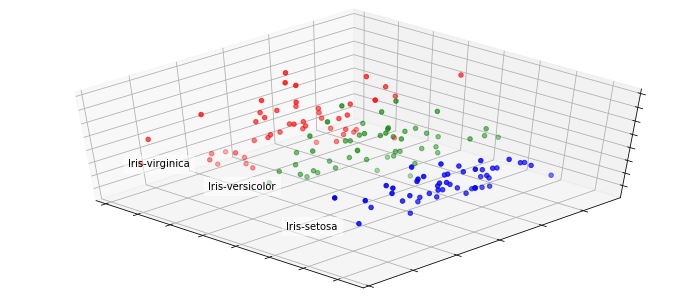

In [20]:
fig = plt.figure(figsize=(10,4))
ax = Axes3D(fig,rect=[0,0,0.95,1],azim=134,elev=48)

for name,label in [('Iris-setosa',0),('Iris-versicolor',1),('Iris-virginica',2)]:  
  ax.text3D(X_tran[Y==label,0].mean(),
            X_tran[Y==label,1].mean() + 1.5,
            X_tran[Y==label,2].mean(),name,
  horizontalalignment='center',
  bbox = dict(alpha=0.5,edgecolor='w',facecolor='w'))
  
Y_final = np.choose(Y,[1,2,0]).astype(np.float)

ax.scatter(X_tran[:,0],X_tran[:,1],X_tran[:,2],c=Y_final,cmap=my_cmap) # plt.cm.nipy_spectral

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


## Plotting the 2D graph

In [28]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

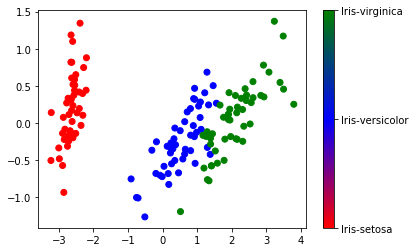

In [33]:
formatter = plt.FuncFormatter(lambda i, *args: data['Species'].unique()[int(i)])
plt.scatter(X_tran[:,0],X_tran[:,1],c=Y,cmap=my_cmap)
plt.colorbar(ticks=[0,1,2],format=formatter)
plt.show()
